In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score

In [2]:
seed = 231094

# Machine Learning with Tree-Based Models

Tree based models can be thought as flow charts. Start at the top with feature A. If Feature A is > 0.5 move to Feature B, else move to Feature C. Run down the tree until the model loss is minimised.
- Decision Tree Classifiers
- Regression Trees
- Random Forests

Trees do not need to be scaled. Unlink linear decision boundaries, tree models make rectangular decision boundaries.

## Decision Trees for Classification

C:\Users\Dillon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


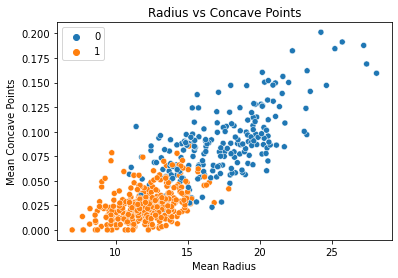

In [3]:
# Breast Cancer Dataset
breast = datasets.load_breast_cancer()
breast_data = breast.data
breast_target = breast.target

radius = breast_data[:, 0]
concave = breast_data[:, 7]

sns.scatterplot(radius, concave, hue = breast_target)
plt.title('Radius vs Concave Points')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Concave Points')
plt.show()

<img src = 'DT.PNG' height = 400>

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=target, random_state=seed)

tree = DecisionTreeClassifier(max_depth = 2, random_state = seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_valid)

accuracy_score(y_valid, y_pred)

NameError: name 'target' is not defined

## Decision Tree for Regression

C:\Users\Dillon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


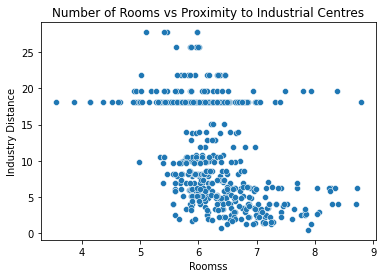

In [ ]:
boston = datasets.load_boston()

boston_data = boston.data
boston_target = boston.target

rooms = boston_data[:, 5]
industry = boston_data[:,2]

sns.scatterplot(rooms, industry)
plt.title('Number of Rooms vs Proximity to Industrial Centres')
plt.xlabel('Roomss')
plt.ylabel('Industry Distance')
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(boston_data, boston_target, train_size = 0.2, random_state=seed)

reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=0) # min_samples_leaf - Each leaf has 10% of data
reg_tree.fit(X_train, y_train)

y_pred = reg_tree.predict(X_valid)

mean_squared_error(y_valid, y_pred)

34.026291994228096

## The Bias-Variance Tradeoff

We make the assumption that there is some function that maps samples to target. We try to find that function. When approximating we can either get overfitting or underfitting. We need to reduce noise to avoid overfitting, but keep enough features that the model isn't underfitting. 

- High bias leads to underfitting. 
- High variance leads to overfitting. 

Hard to balance both. Adding hyperparameters adds to model complexity, which leads to high variance. 

Use cross validation to try find the best model. 
1. Perform CV on X_train, y_train. 
2. Evaluate the accuracy on the CV.
- Get metric of 2. 
3. Evaluate accuracy on a normal model. (On test and train)
- Get metric of 3. 
4. If CV error is equal to training error, and both are greater than testing error - High Bias.  
5. If CV error is greater than training error = High Variance.

In [ ]:
# Using Boston Data

cv = - cross_val_score(reg_tree, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs=-1)

# CV Error
print('CV Score',cv.mean())

# Training Error
y_pred_train = reg_tree.predict(X_train)
print('Training Score', mean_squared_error(y_train, y_pred_train))

# Test Error
print('Testing Score', mean_squared_error(y_valid, y_pred))

CV Score 27.559456883987245
Training Score 13.683379291931846
Testing Score 34.026291994228096


Both scores are smaller than the testing score. Further, training is much lower than CV. Variance problem. Model complexity should be lowered.

## Ensemble Learning

Ensemble Learning is a method whereby the same data is trained on many different models, and then the average of those models is returned. 

In [ ]:
# Breast Cancer Dataset
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

log_reg = LogisticRegression(random_state= seed)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=seed)

classifiers = [
    ('LogisticRegression', log_reg),
    ('KNeighborsClassifier', knn),
    ('DecisionTreeClassifier', tree)
]

vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
y_preds = vc.predict(X_valid)
accuracy_score(y_valid, y_preds)

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9649122807017544

## Bagging

Bootstrap aggregation, or baggin, differs from voting classifers in that vcs use the same training set on a variety of models, where with bagging we use one model on different subsets of the same data. 

Data: A B C

Boot1 = A B B

Boot2 = B B B

Boot3 = A C A

In [ ]:
# Bagging Classifer on breast cancer
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state = seed)
bag = BaggingClassifier(base_estimator=model, n_estimators=300, n_jobs=-1)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.9122807017543859

## Out of bag evaluation

For bagging,  63% of training instances are sampled. The remaining 37% should be used for training. Evaluating on the remaining 37% are the out of bag samples. 

In [ ]:
# OOB on breast cancer
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state = seed)
bag = BaggingClassifier(base_estimator=model, n_estimators=300, oob_score = True, n_jobs=-1)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_valid)

print('Test set accuracy', accuracy_score(y_valid, y_pred))
print('OOB Accuracy', bag.oob_score_)

Test set accuracy 0.9122807017543859
OOB Accuracy 0.9142857142857143


## Random Forests

Random Forests are multiple decisions trees evaluated then averaged together. 

In [ ]:
# Random Forests on Breast Cancer
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.9649122807017544

### Checking important features

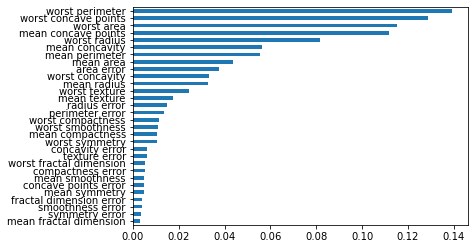

In [ ]:
importances = pd.Series(
    data = rf.feature_importances_,
    index = breast.feature_names
)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind = 'barh')
plt.show()

## Boosting

Boosting is an ensemble method where several weak learners are grouped together to form a strong learner.
Each ensemble is trained sequentially, and each predictor tries to correct its predecessor. 

### Adaboost

Adaptive Boosting - Each predictor pays more attention to the instances wrongly predicted by its predecessor. 
- Changes the weights of training instances.
- Uses learning rate: Between 0 and 1.
- AdaBoostClassifer
- AdaBoostRegressor

In [ ]:
# Ada Boost Brest
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

model = DecisionTreeClassifier(max_depth=1, random_state=seed) # Stump, no learning because of max depth

ada = AdaBoostClassifier(base_estimator=model, n_estimators=100)
ada.fit(X_train, y_train)

y_pred_proba = ada.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, y_pred_proba)

0.992063492063492

### Gradient Boosting

Gradient Boosting performs a similar process to adaptive boosting in that it pays attention to previous instances. It differes from adaboost in that it doesn't change the weights of the training instances. 

For the first instance the model is trained on (X,y). Residual error r1 is calculated from y_hat and y. In the next instance the model is retrained on (X, r1), with a residual error r2 calculated, and so on. This repeats until all trees are evaluated.

- GradientBoostingClassifier
- GradientBoostingRegressor

In [ ]:
# Gradient Boosting Breast
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

gb = GradientBoostingClassifier(max_depth = 8,learning_rate=0.03, n_estimators=100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.956140350877193

### Stochasitc Gradient Boosting

Gradient boosting is an exhaustive process. It needs to evaluate each tree until it finds the best splits. In finding the best splits, the overall model might be comprised of the same features (potential for overfitting). 

In Stochastic Gradient Boosting each tree is trained on a random subset of rows. The ensemble is further diversified (which can lead to larger varience).

- The subsample argument in GradientBoostingClassifier/Regressor determines SGB. If less than 0 it is considered SGB.

In [ ]:
# Stochastic Gradient Boosting Breast
X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

gb = GradientBoostingClassifier(max_depth = 8,learning_rate=0.03, n_estimators=100, subsample = 0.2)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.9736842105263158

## Hyperparameter Tuning

Grid search and randomised search cv is a good starting point. Issue in grid search is computing time. 

First, to check a models hyperparameters:

In [6]:
dt = DecisionTreeClassifier(random_state=seed)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 231094,
 'splitter': 'best'}

In [32]:
# Using GridSearchCV to find optimal parameters

X_train, X_valid, y_train, y_valid = train_test_split(breast_data, breast_target, test_size = 0.2, stratify=breast_target, random_state=seed)

parameters = {
    'max_depth': [2, 4, 6, 8],
    'max_features': [0.2, 0.4, 0.6, 0.8],
    'max_leaf_nodes': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes': [5, 10]
}

dt = DecisionTreeClassifier(random_state = seed)

cv = GridSearchCV(dt, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
cv.fit(X_train, y_train)

print('Best Hyperparameters:',cv.best_params_)
print('Best Score:', cv.best_score_)
print('Best Model', cv.best_estimator_)

Best Hyperparameters: {'max_depth': 4, 'max_features': 0.6, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
Best Score: 0.9428019323671497
Best Model DecisionTreeClassifier(max_depth=4, max_features=0.6, max_leaf_nodes=10,
                       random_state=231094)


In [33]:
# To use the best model:
model = cv.best_estimator_

y_pred = model.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.9473684210526315

In [34]:
# Comparing to generic model:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.9385964912280702

Things to consider are:
- Computationally expensive. Grid Search took 1.1s to evaluate a model that only gave a 0.01 score increase. 
- Scoring parameter needs to be double checked relative to the model type:
    -   Regression: 'neg_mean_squared_error'
    -   Classification: 'accuracy'